# Multiple Linear Regression

- Building a MLR model for prediction of Price of Toyota Corolla Car.
- Price is the Target Column (y) & all others are Independent Features (x).

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA & Data Visualization

In [10]:
# Drop unnecessary column (Cylinders)
data = df.drop(columns=["Cylinders"])
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [11]:
# Encode the Fuel_Type column using one-hot encoding
data = pd.get_dummies(data, columns=["Fuel_Type"], drop_first=True)
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [12]:
# Rename columns for clarity
data.rename(columns={"Age_08_04": "Age", "cc": "CC"}, inplace=True)
data

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


Text(0, 0.5, 'Frequency')

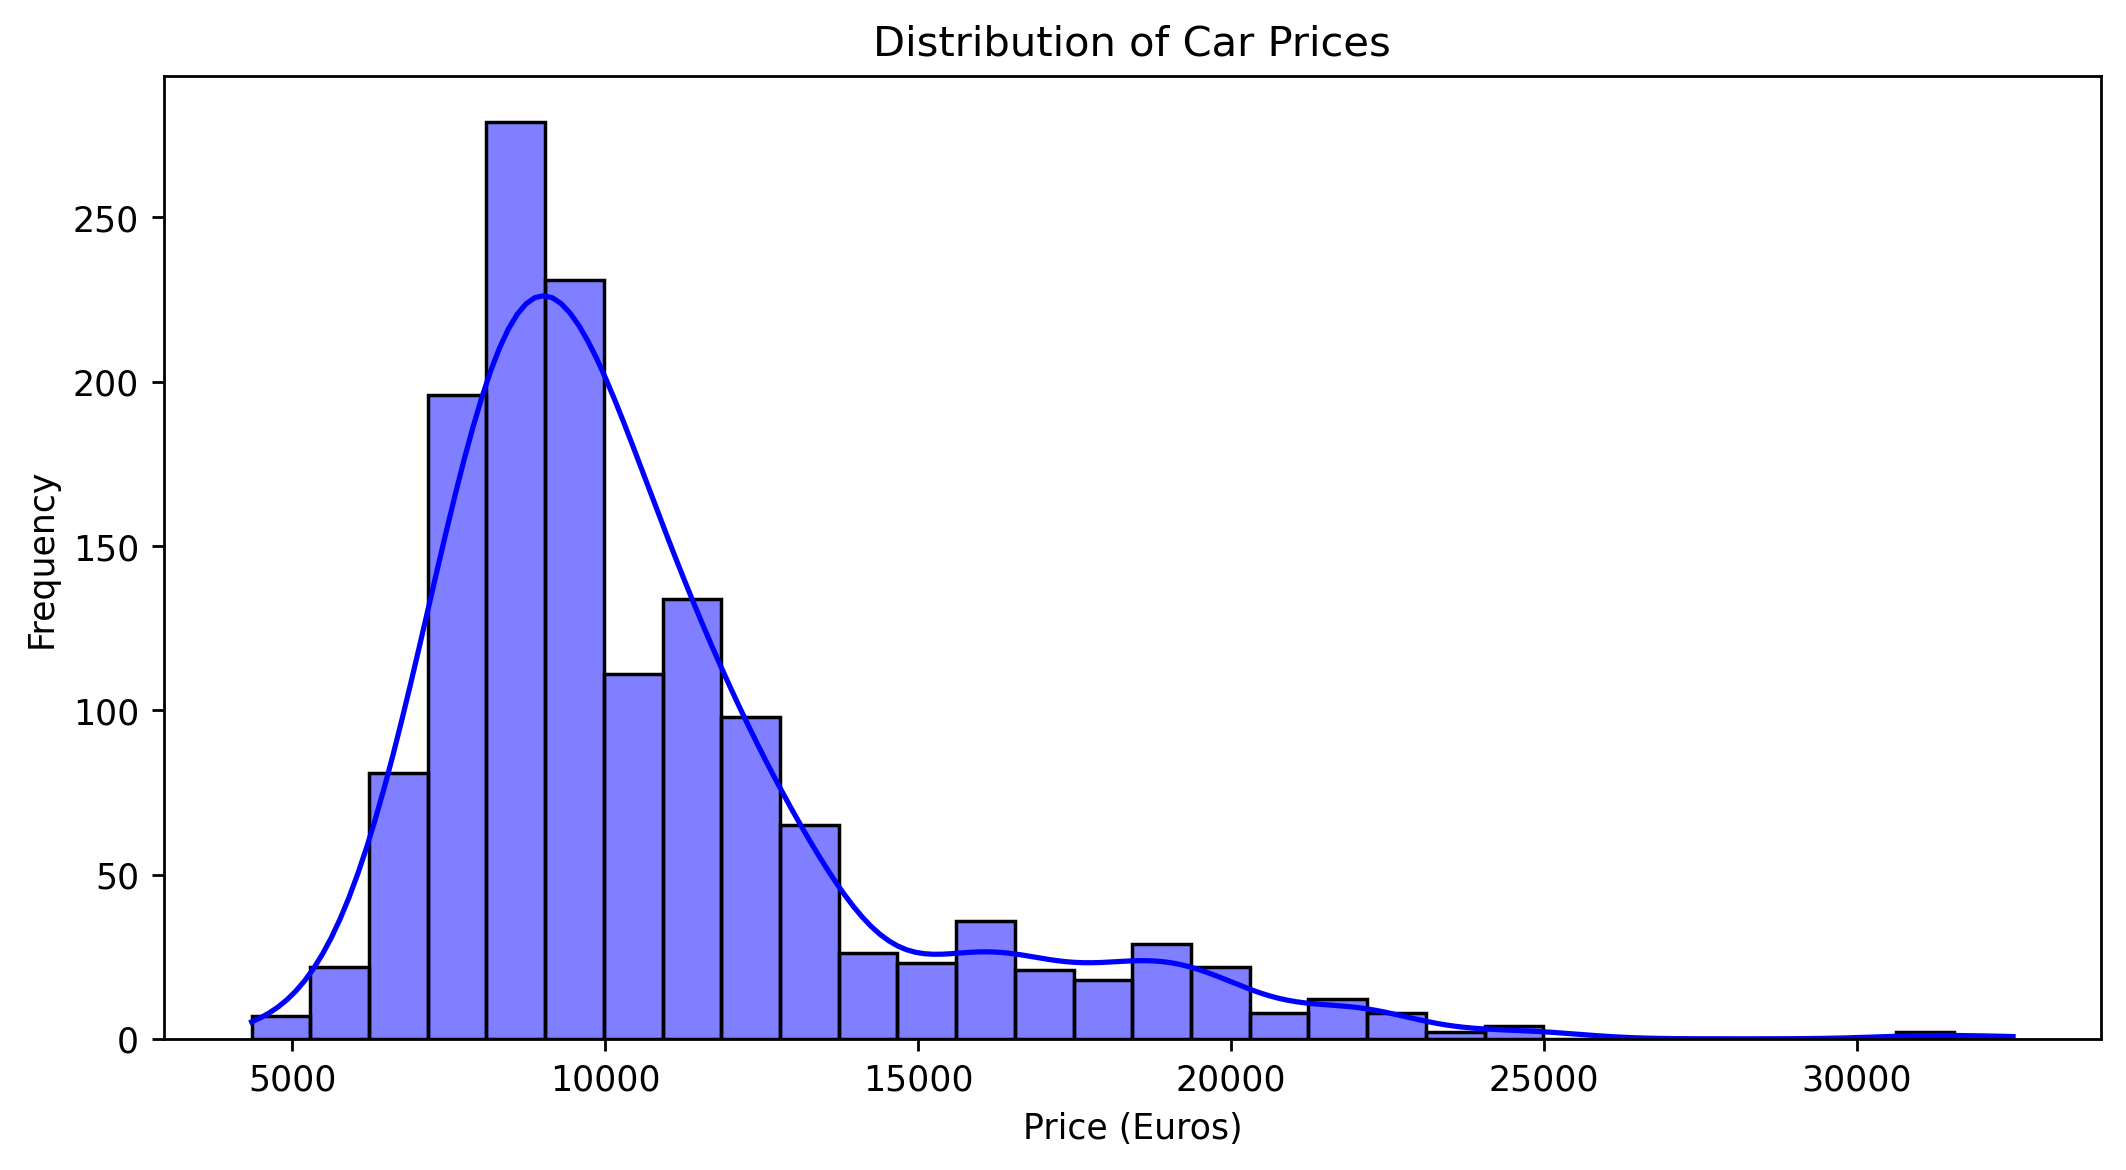

In [13]:
# Plotting the distribution of the target variable (Price)
sns.histplot(data['Price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")

- Price Distribution: The prices of Toyota Corolla cars are right-skewed, with most prices clustered between €5,000 and €15,000.

Text(0.5, 1.0, 'Correlation Matrix')

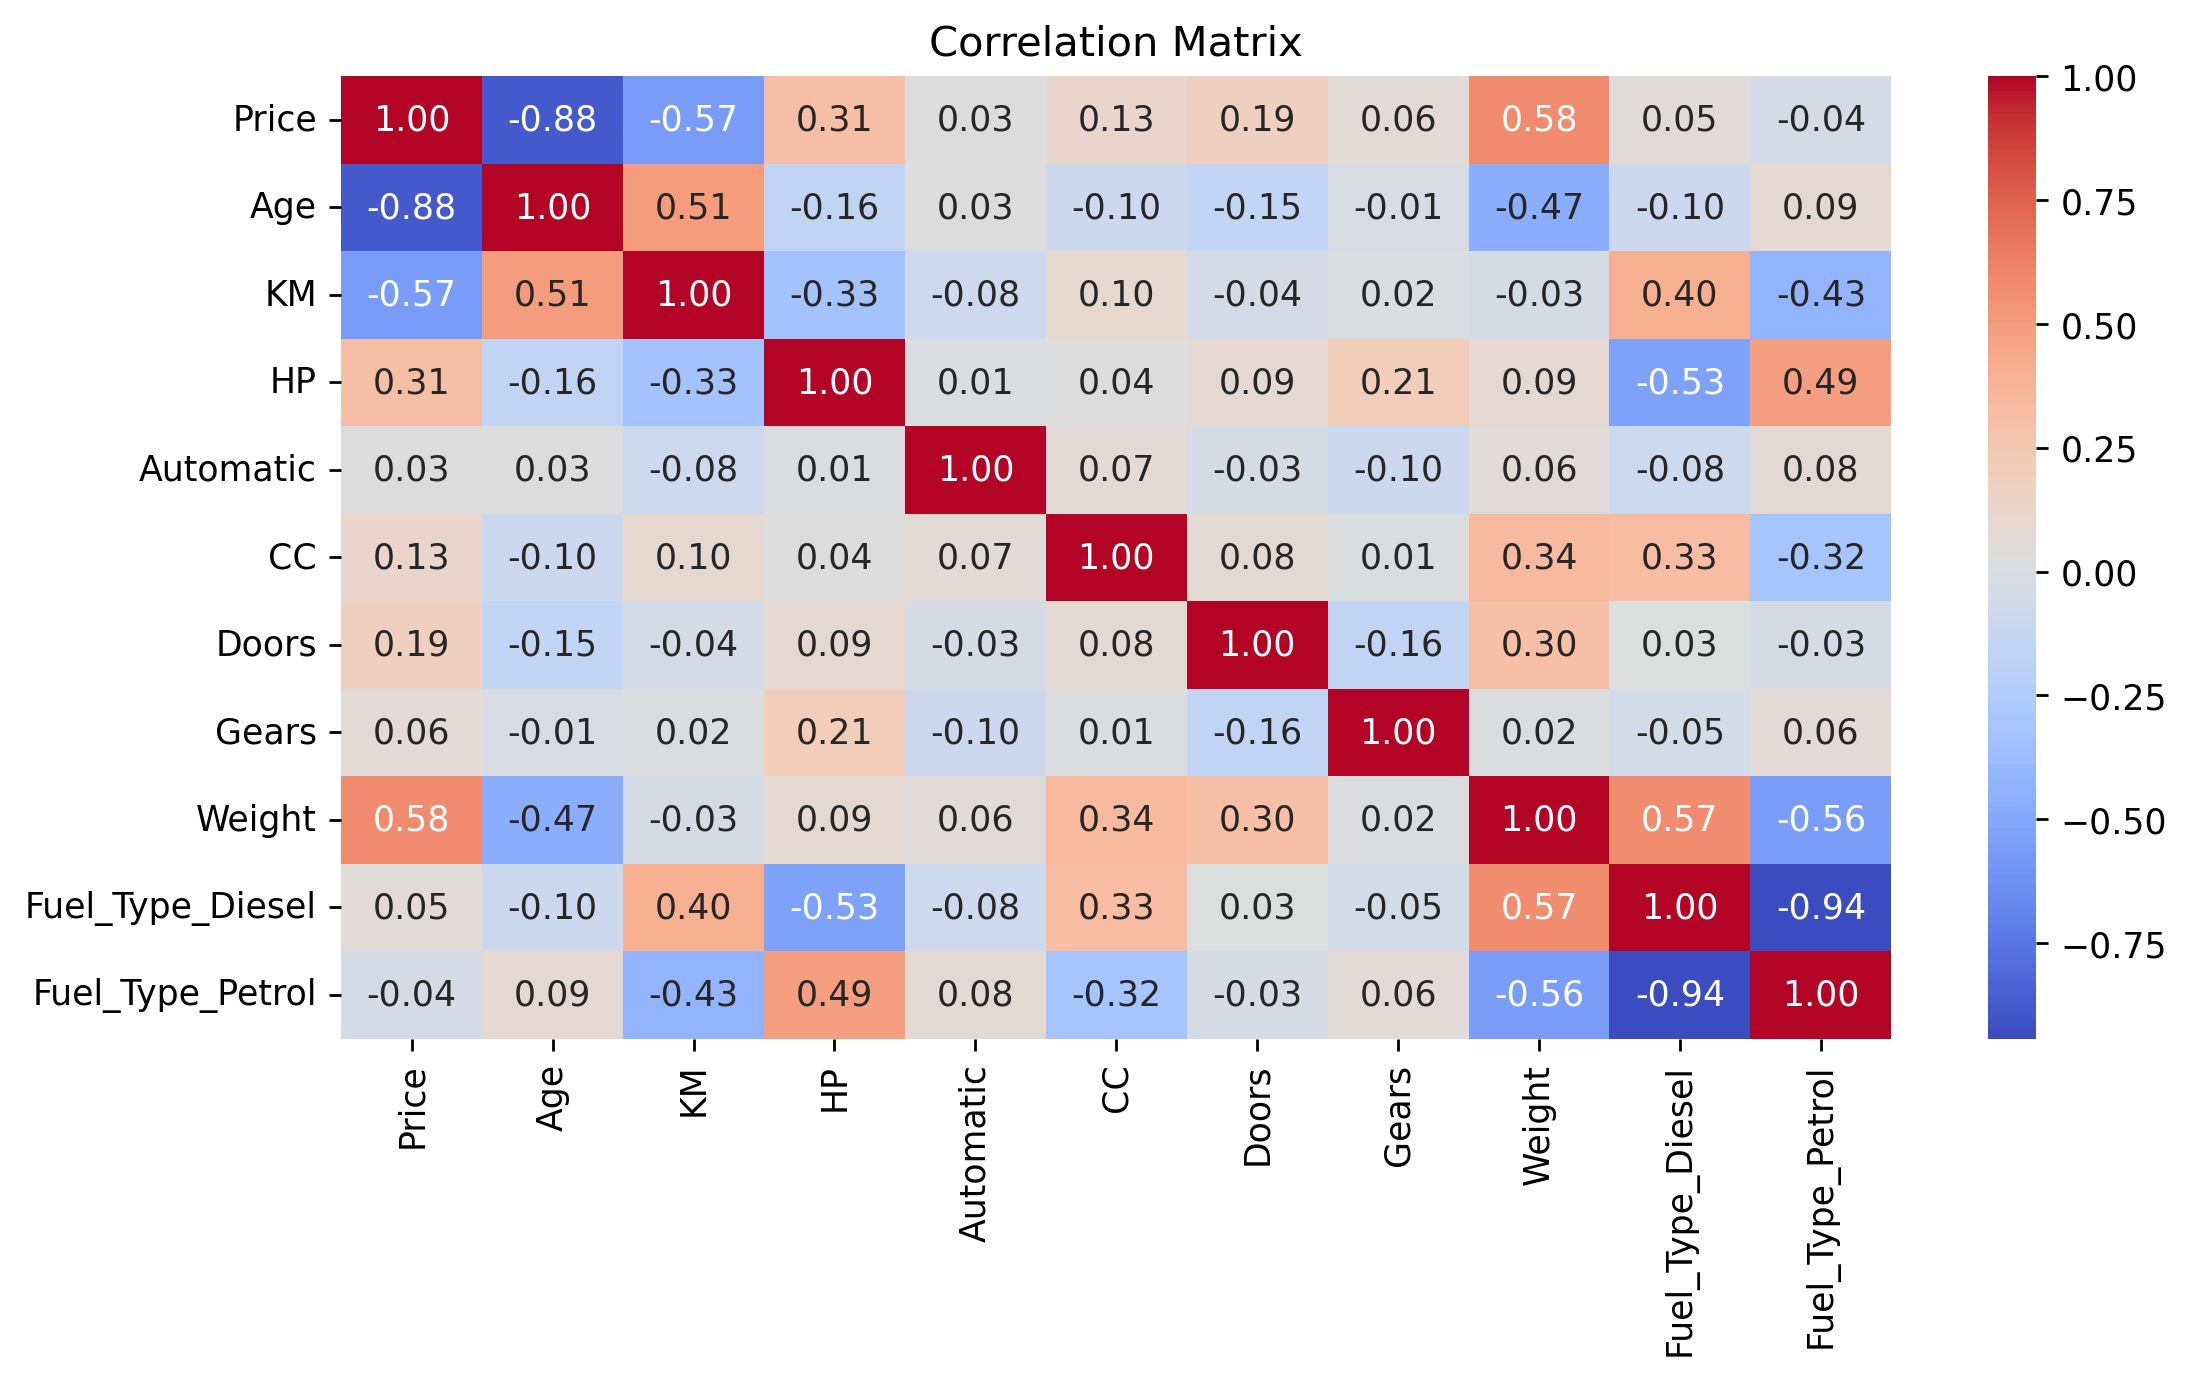

In [15]:
# Correlation matrix heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")

- Correlation Matrix:

    1. Age, KM, and Weight show moderate correlations with Price.
    2. CC and HP have lower correlations with Price, though they may still contribute to the model.
    3. Multicollinearity might exist between some predictors (e.g., CC and Weight).

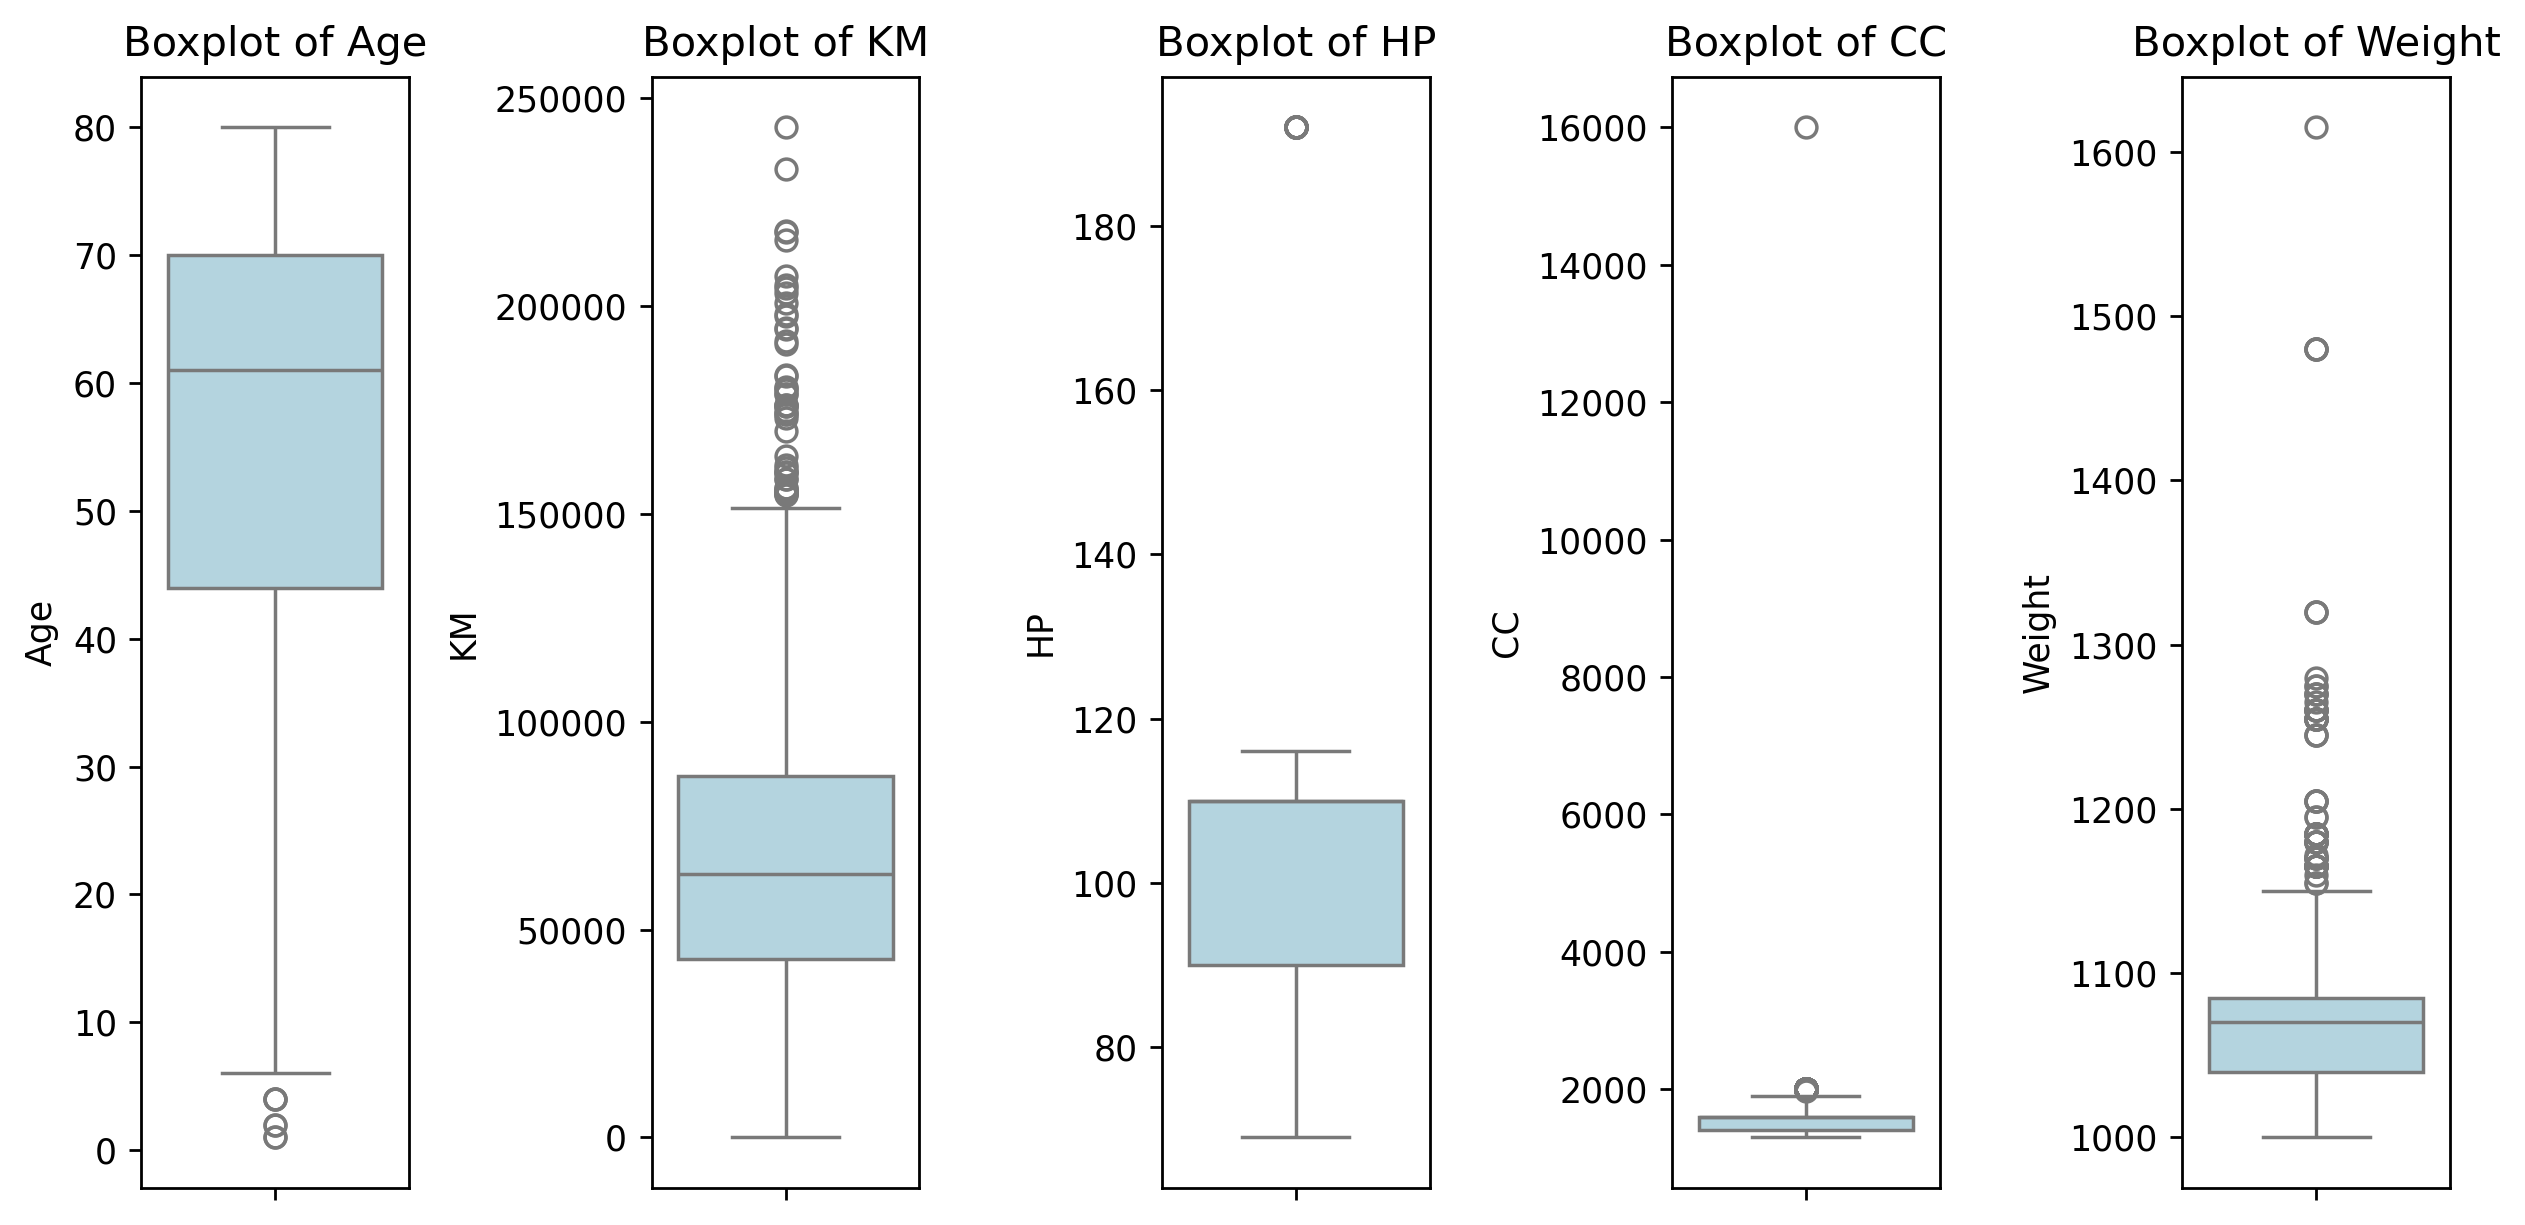

In [17]:
# Boxplot for numerical variables to identify outliers
numerical_cols = ["Age", "KM", "HP", "CC", "Weight"]
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=data[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()

- Outliers: The boxplots reveal potential outliers in variables like CC and KM, which may affect the regression model.

# Splitting Data into Training & Testing Parts

- Using train_test_split function.

In [20]:
# Split the dataset into features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

In [21]:
X

,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,True,False
1,23,72937,90,0,2000,3,5,1165,True,False
2,24,41711,90,0,2000,3,5,1165,True,False
3,26,48000,90,0,2000,3,5,1165,True,False
4,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,False,True
1432,72,19000,86,0,1300,3,5,1015,False,True
1433,71,17016,86,0,1300,3,5,1015,False,True
1434,70,16916,86,0,1300,3,5,1015,False,True


In [22]:
X["Fuel_Type_Diesel"] = X["Fuel_Type_Diesel"].astype(int)
X["Fuel_Type_Petrol"] = X["Fuel_Type_Petrol"].astype(int)
X

,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,1,0
1,23,72937,90,0,2000,3,5,1165,1,0
2,24,41711,90,0,2000,3,5,1165,1,0
3,26,48000,90,0,2000,3,5,1165,1,0
4,30,38500,90,0,2000,3,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,1
1432,72,19000,86,0,1300,3,5,1015,0,1
1433,71,17016,86,0,1300,3,5,1015,0,1
1434,70,16916,86,0,1300,3,5,1015,0,1


In [23]:
# Split the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.dtypes)

Age                 int64
KM                  int64
HP                  int64
Automatic           int64
CC                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_Diesel    int32
Fuel_Type_Petrol    int32
dtype: object


In [25]:
X_train["Fuel_Type_Diesel"] = X_train["Fuel_Type_Diesel"].astype(int)
X_train["Fuel_Type_Petrol"] = X_train["Fuel_Type_Petrol"].astype(int)
X_train

,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
899,62,59295,86,0,1300,5,5,1035,0,1
881,68,61568,110,0,1600,4,5,1035,0,1
310,40,38653,110,0,1600,5,5,1080,0,1
1145,75,101855,110,0,1600,5,5,1070,0,1
31,22,35199,97,0,1400,3,5,1100,0,1
...,...,...,...,...,...,...,...,...,...,...
1095,76,125778,110,0,1600,3,5,1050,0,1
1130,73,107108,110,0,1600,3,5,1050,0,1
1294,80,71740,110,0,1600,5,5,1070,0,1
860,63,64690,86,0,1300,3,5,1020,0,1


In [26]:
X_train.dtypes

Age                 int64
KM                  int64
HP                  int64
Automatic           int64
CC                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_Diesel    int32
Fuel_Type_Petrol    int32
dtype: object

In [27]:
# Calculating VIF values to see if there is Multi-collinearity present or not

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF results
vif_data

,Feature,VIF
0,const,1877.037630
1,Age,1.920520
2,KM,2.001790
3,HP,2.299766
4,Automatic,1.094550
5,CC,1.223892
6,Doors,1.217898
7,Gears,1.117413
8,Weight,3.297145
9,Fuel_Type_Diesel,11.317251


- The "Fuel_Type_Diesel" & "Fuel_Type_Petrol" columns have a higher VIF value which means there is a problem of Multi-collinearity in the Dataset.

# MLR Models

- Building 3 Models for choosing the best model for prediction purpose.

In [30]:
# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
print("Model 1 Coefficients:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {model1.coef_[i]}")

Model 1 Coefficients:
Age: -120.83045817097113
KM: -0.016231410612674264
HP: 14.039478769759077
Automatic: 148.83092691182125
CC: -0.030372194607021497
Doors: -60.31097437498837
Gears: 551.600710265982
Weight: 25.88495831327447
Fuel_Type_Diesel: -68.54875675828646
Fuel_Type_Petrol: 1370.8089098159792


In [31]:
# Model 2: Linear Regression with Interaction Terms
X_train_interaction = X_train.copy()
X_train_interaction['Age_KM'] = X_train['Age'] * X_train['KM']  # Interaction term
model2 = LinearRegression()
model2.fit(X_train_interaction, y_train)

# Coefficients
print("\nModel 2 Coefficients (with interaction term):")
for i, col in enumerate(X_train_interaction.columns):
    print(f"{col}: {model2.coef_[i]}")


Model 2 Coefficients (with interaction term):
Age: -149.46343641849728
KM: -0.05107941529433032
HP: 18.37156167596025
Automatic: 256.8033458145329
CC: -0.05091169012351203
Doors: -44.21377516187265
Gears: 619.7791131384962
Weight: 22.46742809776809
Fuel_Type_Diesel: 165.7137645907156
Fuel_Type_Petrol: 1069.2310806853593
Age_KM: 0.0005689136261107532


- Explanation of Polynomial Regression Model

- Polynomial regression is a type of regression analysis that uses polynomial functions to model the relationship between an independent variable and a dependent variable. It's an extension of linear regression, which assumes a linear relationship between the variables.

In [33]:
# Model 3: Linear Regression with Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Quadratic features
X_train_poly = poly.fit_transform(X_train)
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

# Coefficients
print("\nModel 3 Coefficients (Polynomial Regression):")
for i, col in enumerate(poly.get_feature_names_out(X_train.columns)):
    print(f"{col}: {model3.coef_[i]}")


Model 3 Coefficients (Polynomial Regression):
1: -0.019532473920824488
Age: 181.82948567989936
KM: -0.2201240361766988
HP: -54.03958709725742
Automatic: 7724.78978065932
CC: 30.253281288043098
Doors: -17067.48089720958
Gears: -1397.5636711407476
Weight: 19.039795812433493
Fuel_Type_Diesel: 623.426043896533
Fuel_Type_Petrol: -628.659424403587
Age^2: 0.011409544735748511
Age KM: 0.0003984938812209293
Age HP: 0.8113960487568406
Age Automatic: 10.180749646054034
Age CC: -0.11343505030282586
Age Doors: 13.127107457801806
Age Gears: 124.3040842528019
Age Weight: -0.8185611492754106
Age Fuel_Type_Diesel: 82.29657768126509
Age Fuel_Type_Petrol: -34.016948799234875
KM^2: -8.94735876499908e-08
KM HP: -0.00031287407614399854
KM Automatic: -0.0026001486667155405
KM CC: 7.361357461377338e-06
KM Doors: -0.0034909623627754627
KM Gears: -0.003063224211700799
KM Weight: 0.00021290587937983219
KM Fuel_Type_Diesel: -0.0007306697308422372
KM Fuel_Type_Petrol: 0.021878762790258577
HP^2: 0.4573515890810284

# Evaluation & Taking Predictions from Test Data

In [35]:
# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test.assign(Age_KM=X_test['Age'] * X_test['KM']))
y_pred3 = model3.predict(poly.transform(X_test))

In [36]:
y_pred1

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [37]:
y_pred2

array([11228.93313127,  8953.77845868,  9150.11468578,  8938.53702319,
        9927.93067184,  8218.88084376,  8683.62378211,  8193.42118121,
       13864.56536017, 13037.02237384,  9492.20926597,  9221.05212319,
       12770.45380944, 13231.78232934,  9652.07585211,  8228.56853351,
       12240.47290409, 16073.61163513,  7868.57324698,  9066.77559728,
       12598.87637554, 18708.12209358,  7973.18775604, 10346.37330045,
        7662.60212484, 16258.54898095,  9867.97181379,  7827.39542588,
       15821.10554032, 14615.01668082,  8277.31578048,  9572.65513783,
        8534.99668893,  9953.59114422, 10112.12344899,  8199.02363602,
        8771.15678855,  9831.60446087, 16572.14741192,  9476.63844205,
        9716.94329837,  9409.19992426,  8051.9912064 ,  6350.28857211,
        6957.52983829, 17168.48540275,  9357.87037546, 10487.36138406,
        8647.99234186, 13506.8593353 , 13030.80576961,  6464.30615687,
       14607.15530869, 16713.32135523,  6624.19168009,  8061.48204607,
      

In [38]:
y_pred3

array([10636.20283183,  8859.3184543 ,  9588.55356709,  8872.17002447,
        9814.06305229,  8112.96538258,  8823.11168517,  8034.00182534,
       13569.28103671, 12711.6135067 ,  9551.2701617 ,  9019.36813878,
       12478.1153225 , 12119.11126322,  9633.68204659,  8666.38785066,
       11462.38300202, 18596.26344716,  7639.07574822,  8993.10756604,
       12305.28218237, 18773.21036329,  7764.22844502, 10072.91761031,
        8318.27911879, 16521.73581246,  9895.96782003,  7612.66172962,
       15700.70059734, 14007.09693644,  8200.14841676,  9186.28724123,
        8491.13719646,  9908.47724697, 10011.35633606,  8041.7969496 ,
        8872.18524743,  9786.08281864, 16536.38342823,  9384.86266615,
        9578.13208493,  9299.23953807,  8012.17438832,  6730.8689501 ,
        7820.10467754, 18613.99004083,  9305.9304467 , 10412.61717409,
        8936.61643631, 12992.64951288, 12588.58509542,  7523.81128071,
       15125.0959163 , 16427.43715263,  7230.26771835,  7962.17717372,
      

In [39]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y_test, y_pred2, "Model 2")
evaluate_model(y_test, y_pred3, "Model 3")

Model 1 - MSE: 2203043.823143701, R2: 0.8348888040611083
Model 2 - MSE: 1839093.4132573076, R2: 0.8621657410005841
Model 3 - MSE: 3085061.547588447, R2: 0.7687843535765242


- Model 2 gives R2 Score of 86% which is really good.
- It also has MSE less than other 2 Models.

# Apply Lasso and Ridge Regression

In [42]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Lasso Regression - MSE: 2202270.2600246808, R2: 0.8349467801805


In [43]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression - MSE: 2202732.2441678997, R2: 0.8349121559240098


# Interview Questions

1. What is Normalization & Standardization and how is it helpful ?
   - Normalization and standardization improve the performance of machine learning algorithms by ensuring similar scales for features. They prevent any one feature from dominating the others, leading to more accurate predictions. They also help to handle outliers and improve the computational efficiency of the algorithms.ues.

2. What techniques can be used to address multicollinearity in multiple linear regression ?
   - Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity exists when there are linear relationships among the independent variables, this causes issues in regression analysis because it does not follow the assumption of independence among predictors. In this article, we will see what the causes are and how to detect and mitigate multicollinearity. Detecting multicollinearity involves examining various diagnostic tools to assess the degree of correlation among predictor variables. Here are some common methods:

   - Correlation Matrices: This involves calculating the correlation coefficients between pairs of predictor variables. High correlation coefficients (close to +1 or -1) indicate strong linear relationships between variables, which may suggest multicollinearity.
     
    - Variance Inflation Factors (VIFs): VIF measures how much the variance of an estimated regression coefficient is inflated due to multicollinearity. A VIF greater than 10 (some use 5) is often considered indicative of multicollinearity, suggesting that the variance of the coefficient estimate is inflated by at least 10 times compared to what it would be if the predictors were uncorrelated.

- By using these methods, analysts can assess the presence and severity of multicollinearity in their regression models and take appropriate steps to address it, such as removing highly correlated variables or using regularization techniques.